In [56]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [73]:
def process_image(image):
    
    blur = cv2.GaussianBlur(image, (3, 3), 0)
    
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened = cv2.filter2D(blur, -1, kernel)
    
    return blur

In [67]:
def otsu(image):
    
    # blur = cv2.GaussianBlur(img,(5,5),0) #Applying Gaussian Blurr on image to get better threshold
    
    _, otsu_img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    return otsu_img

In [68]:
def adpt(image):
    
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 5, 4)

In [69]:
def gauss(image):
    
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 5, 4)

In [70]:
def imgShow(og_img, otsu_img, adpt_img, gaus_img):
    fig = plt.figure(figsize=(10, 3))
    
    rows = 1
    columns = 4
    
    fig.add_subplot(1, 4, 1)

    fig.add_subplot(rows, columns, 1) 
    
    # showing image 
    plt.imshow(og_img, cmap='gray') 
    plt.axis('off') 
    plt.title("Original") 

    # Adds a subplot at the 2nd position 
    fig.add_subplot(rows, columns, 2) 

    # showing image 
    plt.imshow(otsu_img, cmap='gray') 
    plt.axis('off') 
    plt.title("Otsu Threshold") 

    # Adds a subplot at the 3rd position 
    fig.add_subplot(rows, columns, 3) 

    # showing image 
    plt.imshow(adpt_img, cmap='gray') 
    plt.axis('off') 
    plt.title("Adaptive Threshold") 

    # Adds a subplot at the 4th position 
    fig.add_subplot(rows, columns, 4) 

    # showing image 
    plt.imshow(gaus_img, cmap='gray') 
    plt.axis('off') 
    plt.title("Gaussian Threshold") 

In [71]:
def convert(src_directory, dest_directory, thresh = 127):
    images = os.listdir(src_directory)
    for image in images:
        path = src_directory + image
        dest_path = dest_directory + image
        if not os.path.isfile(path):
            continue
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        
        preprocessed_img = process_image(img)
        
        imgShow(img, otsu(preprocessed_img), adpt(preprocessed_img), gauss(preprocessed_img))
#         print(image)
#         plt.imshow(otsuimg, cmap='gray')
#         plt.show()

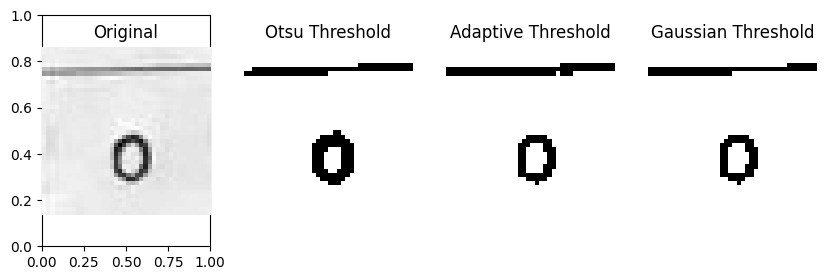

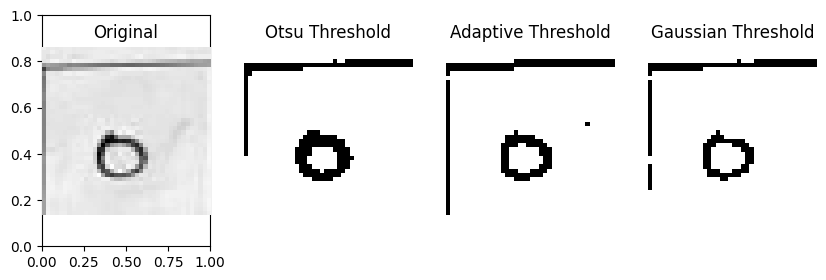

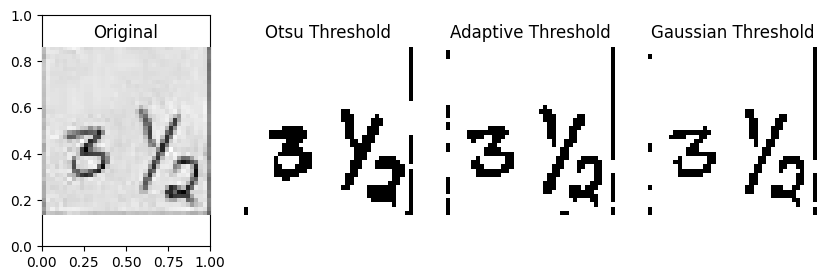

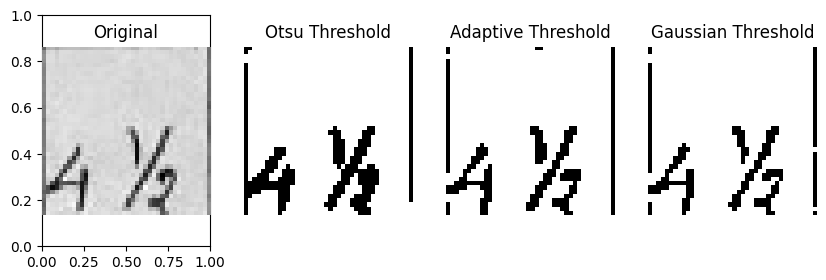

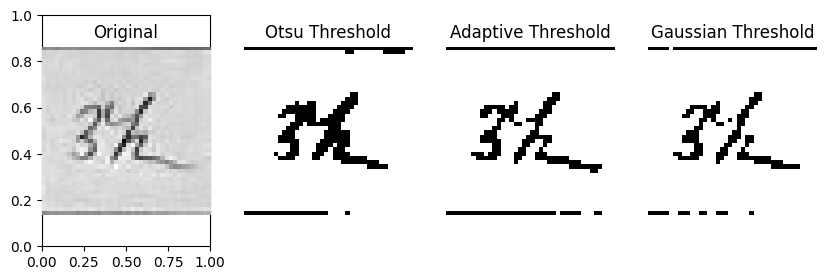

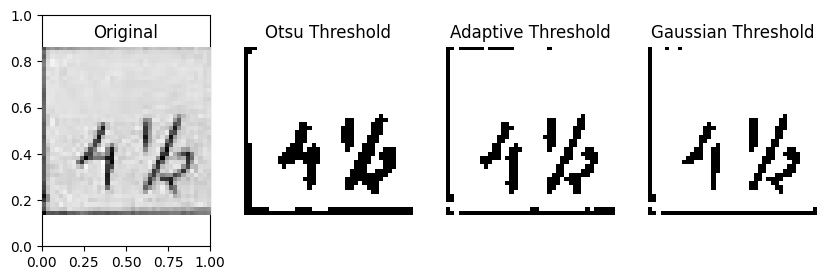

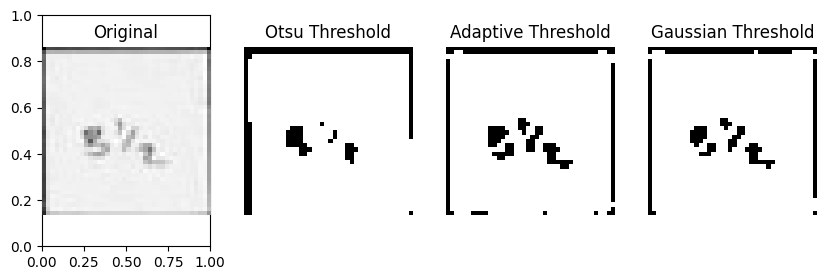

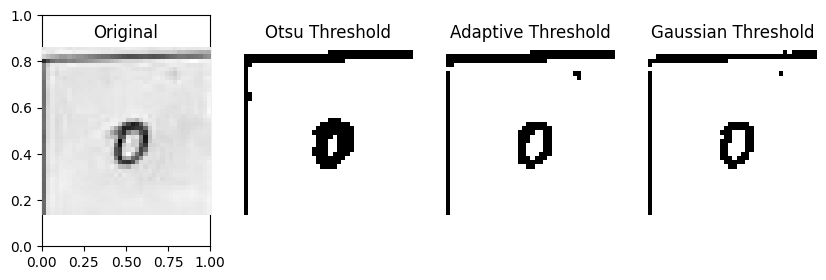

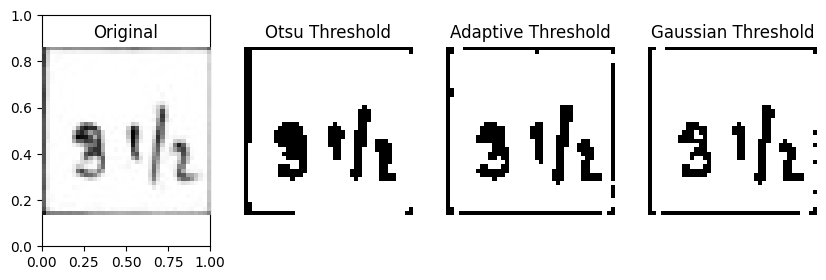

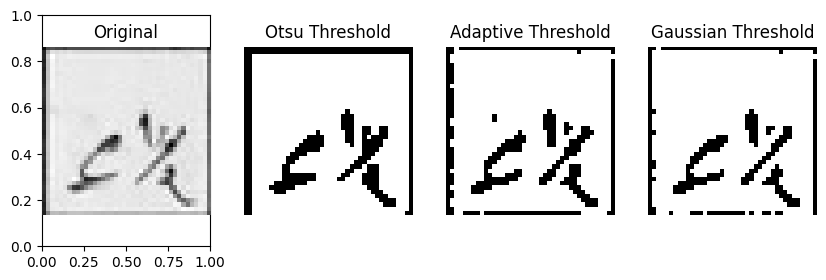

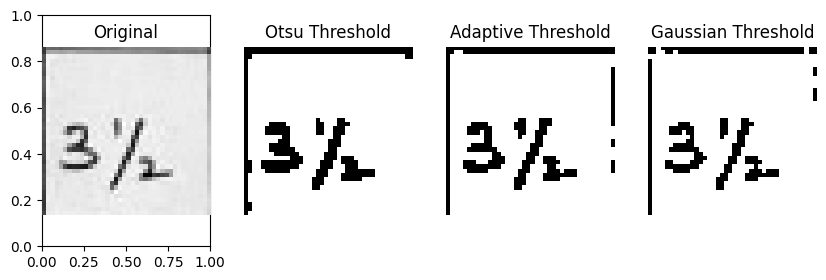

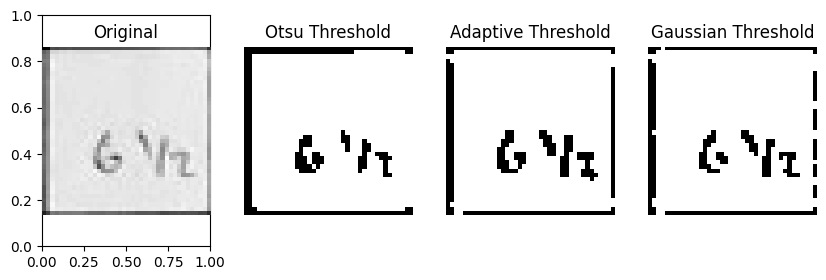

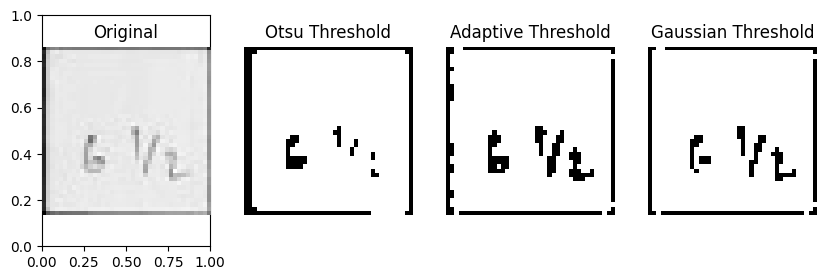

In [74]:
if __name__ == "__main__":
    
    #update this before using
    source_folder_path = "Sample_Data/Cropped/"
    destination_folder_path = "Sample_Data/Cropped/bw"
    convert(source_folder_path, destination_folder_path)